<h1> Analisando Datas </h1>

Neste notebook, nós vamos trabalhar com datas.

<h1> Deixe seu ambiente configurado </h1>

A primeira coisa que devemos fazer é carregar as bibliotecas que usaremos.
Baixe os dataset que usaremos no seguinte link : https://www.kaggle.com/nasa/landslide-events

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv("catalog.csv")

np.random.seed(0)

<h1> Checandno o tipo de dado na nossa coluna date </h1>

Vamos olhar as primeiras 5 linhas do nosso dado

In [2]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


Nós vamos trabalhar com a coluna `date` do nosso DataFrame. Vamos ter certeza que realmente essa coluna guarda datas:

In [3]:
print(landslides["date"].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


Sim são datas. Porém isso é devido que eu sou um humano e digo que são datas, porpem isso nã significa que o Python sabe disso. Note que no final do output você pode ver que diz que o tipo de dados dessa coluna é "object"

Pandas usa o tipo "objeto" para armazenas inúmeros tipos de dados, porém na maioria das vezes em uma coluna desse tipo você vê que possui strings

Se você checar a documentação, verá que existe um tipo específico `datetime64`. Por conta que nossa coluna está como `object` ao invés de `datime64`, podemos afirmar que o Python não sabe que essa coluna contém datas.

Nós podemos olhar apenas o tipo da coluna vendo sem ter que imprimir suas primeiras linhas:

In [4]:
landslides['date'].dtype

dtype('O')

<h1> Convertendo nossa coluna em datetime </h1>

Agora que sabemos que nossa coluna date não está sendo reconhecida como data, é a hora para convertemos para que seja reconhecido como data. Esse processo é chamado de "parsing dates" por que estamos pegando uma string e identificando seus componentes. 

Nós podemos dizer ao panda qual é o formato das datas. A idéia básica que você precisa entender é qual o ponto das partes das datas estamos e como pontualas. Existem muitos tipos de formatação de datas, porém a mais comum é `%d` para dia, `%m` para mês, `%y` para ano com 2 dígitos e `%Y` para anos com 4 dígitos. Por Exemplo:

1/17/07 -> tem o formato de "%m/%d/%y"
17-1-2007 -> tem o formato de "%d-%m-%Y"

Olhando novamente nossa coluna, podemos ver o formato "mês/dia/ ano 2 dígitos ", podemos usar a mesma syntax como o exemplo anterior:

In [5]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

Agora quando nós checarmos as primeiras linhas da nossa nova coluna, vamos ver o tipo `datetime64`.

In [6]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Agora que nossas datas estão corretas, podemos interagir de formas muito úteis:
<hr>
<b> E se eu encontrar um erro com vários formatos de data?</b> Embora estejamos especificando o formato de data aqui, às vezes você encontrará um erro quando houver vários formatos de data em uma única coluna. Se isso acontecer, você fez com que os pandas tentassem inferir qual deveria ser o formato de data correto. Você pode fazer isso assim:
             
             landslides['date_parsed'] = pd.to_datetime (landslides['Date'], infer_datetime_format = True)

<b>Por que você não usa sempre infer_datetime_format = True?</b> Existem dois grandes motivos para nem sempre os pandas adivinharem o formato da hora. A primeira é que os pandas nem sempre são capazes de descobrir o formato de data correto, especialmente se alguém for criativo com a entrada de dados. A segunda é que é muito mais lento do que especificar o formato exato das datas.
<hr>
<h1> Selecionando o dia de um mês </h1>

Agora que temos uma coluna de datas, nós podemos extrair todos os dias que um deslizamento ocorreu:

In [8]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

<h1> Trace o dia do mês para verificar a análise da data </h1>

Um dos maiores perigos na análise de datas é misturar meses e dias. A função `to_datetime ()` tem mensagens de erro muito úteis, mas não custa verificar se os dias do mês que extraímos fazem sentido.

Para fazer isso, vamos traçar um histograma dos dias do mês. Esperamos que tenha valores entre 1 e 31 e, como não há razão para supor que os deslizamentos sejam mais comuns em alguns dias do mês do que em outros, uma distribuição relativamente uniforme. (Com uma queda em 31 porque nem todos os meses têm 31 dias.) Vamos ver se é esse o caso:

<AxesSubplot:xlabel='date_parsed'>

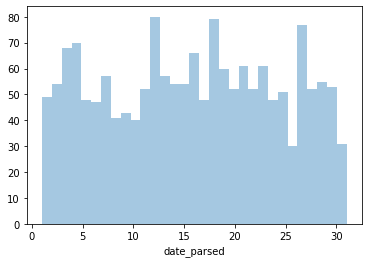

In [11]:
day_of_month_landslides = day_of_month_landslides.dropna()


sns.distplot(day_of_month_landslides, kde=False, bins=31)

Sim, parece que analisamos nossas datas corretamente e este gráfico faz sentido para mim.

<h1> Exercícios </h1> 

Para realizacão desses exercícios baixe o arquivo utilizado no seguinte link:

https://www.kaggle.com/usgs/earthquake-database

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

earthquakes = pd.read_csv("database.csv")

np.random.seed(0)


# 1) Verifique o tipo de dados de nossa coluna de data

Você trabalhará com a coluna "Date" do dataframe `eathquakes`. Investigue esta coluna agora: parece que contém datas? Qual é o tipo da coluna?

In [14]:
#Digite su código aqui

<details><summary>Clique aqui para ver a resposta.</summary>

```python
earthquakes['Date'].dtype
```

</details>

# 2) Converta nossas colunas de data em datetime

A maioria das entradas na coluna "Date" segue o mesmo formato: "mês / dia / ano de quatro dígitos". No entanto, a entrada no índice 3378 segue um padrão completamente diferente. Execute a célula de código abaixo para ver isso.

In [15]:
earthquakes[3378:3383]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed



Isso parece ser um problema com a entrada de dados: o ideal é que todas as entradas na coluna tenham o mesmo formato. Podemos ter uma ideia de quão difundido é esse problema verificando o tamanho de cada entrada na coluna "Date".

In [16]:
date_lengths = earthquakes.Date.str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

Parece que há mais duas linhas com uma data em um formato diferente. Execute a célula de código abaixo para obter os índices correspondentes a essas linhas e imprimir os dados.

In [17]:
indices = np.where([date_lengths == 24])[1]
print('Indices with corrupted data:', indices)
earthquakes.loc[indices]

Indices with corrupted data: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


Com todas essas informações, é sua vez de criar uma nova coluna "date_parsed" no conjunto de dados `earthquakes` que tem datas analisadas corretamente.

** Nota **: Ao resolver este problema, você tem permissão (mas não é obrigado a) corrigir as entradas nas colunas "Data" e "Hora". Não remova nenhuma linha do conjunto de dados.

In [18]:
#Seu código aqui

<details><summary>Clique aqui para ver a resposta.</summary>

```python
earthquakes.loc[3378, "Date"] = "02/23/1975"
earthquakes.loc[7512, "Date"] = "04/28/1985"
earthquakes.loc[20650, "Date"] = "03/13/2011"
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")
```

</details>

# 3) Selecione o dia do mês

Crie uma série Pandas `day_of_month_earthquakes` contendo o dia do mês da coluna" date_parsed ".

In [20]:
#Seu código aqui

<details><summary>Clique aqui para ver a resposta.</summary>

```python
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
```

</details>

# 4) Trace o dia do mês para verificar a análise da data

Trace os dias do mês a partir do conjunto de dados do terremoto.

In [21]:
#Seu código aqui

<details><summary>Clique aqui para ver a resposta.</summary>

```python

day_of_month_earthquakes = day_of_month_earthquakes.dropna()


sns.distplot(day_of_month_earthquakes, kde=False, bins=31)
```

</details>